In [ ]:
# http://blog.jobbole.com/70549/

In [1]:
import numpy as np
import pandas as pd
# 读取图片为一个一维数组
from PIL import Image
# 傅里叶变换
# fft  时域--频域
# ifft  频域--时域
from numpy.fft import fft,ifft

In [42]:
# 加载图片
car = Image.open('car.jpg')

In [43]:
# 把图片读取成数据
car_data = np.frombuffer(car.tobytes(),dtype=np.int8)

In [44]:
car_data.shape

(3645000,)

In [45]:
car_data

array([70,  0,  0, ...,  1,  1,  1], dtype=int8)

In [46]:
# 把数据转换到频域
fft_data = fft(car_data)

In [47]:
# 复数形式
fft_data

array([52872143.               +0.j        ,
        5466067.82947251 -7924894.3777917j ,
       -7386539.14685244+12343642.44010671j, ...,
        1677686.371377   -1350290.88661838j,
       -7386539.14685262-12343642.44010663j,
        5466067.82947263 +7924894.37779164j])

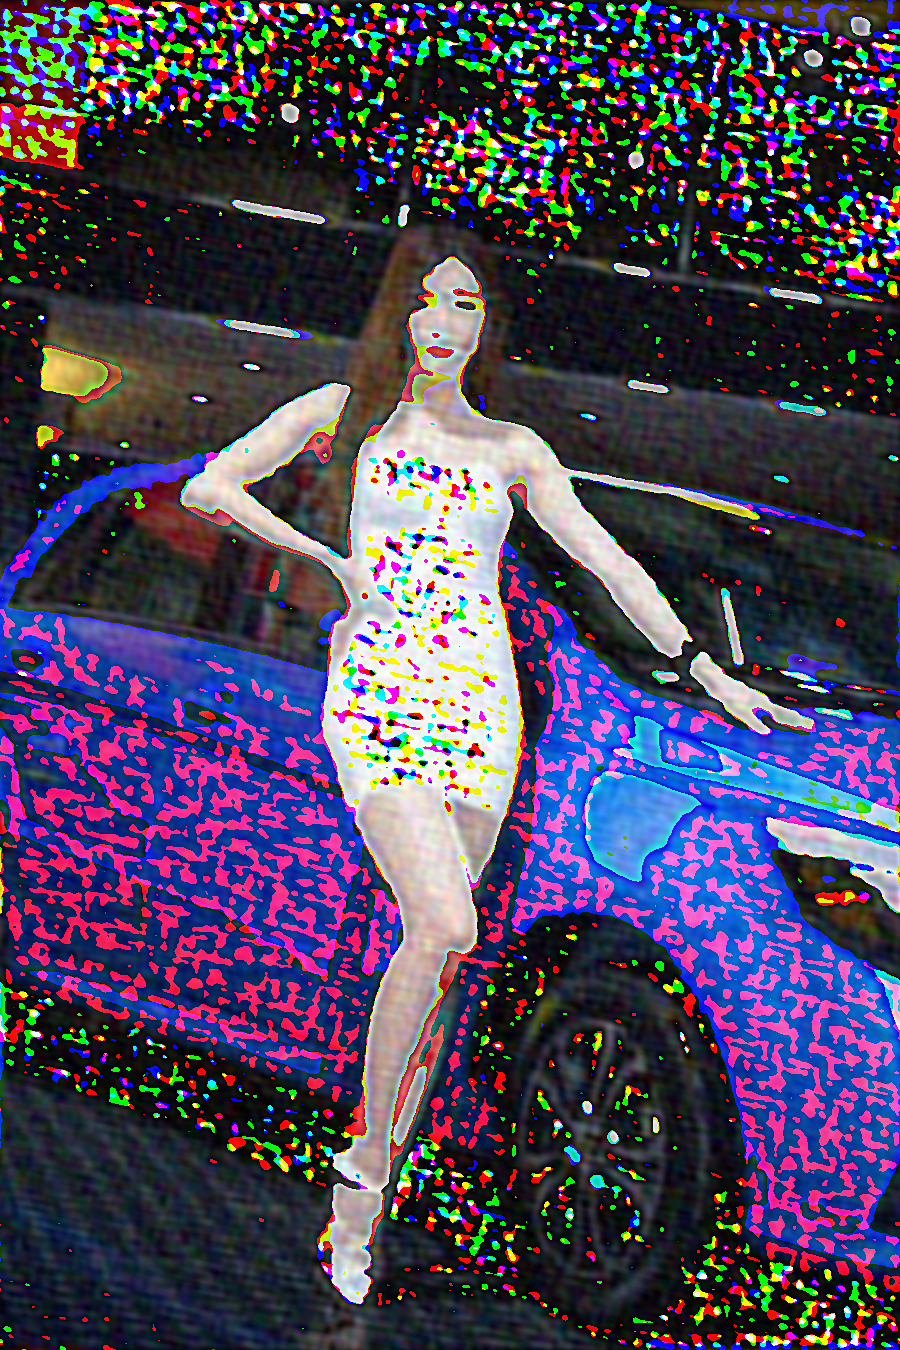

In [57]:
# 滤波操作 低频波滤掉
# 确定一个过滤条件，绝对值 < 某个阈值
condition = np.abs(fft_data) < 1e5
# 通过满足过滤条件的数据的索引，进行清零操作
fft_data[np.where(condition)] = 0

n = np.array([1,6,9,7,4,2,3])
n[np.where(n<5)]=0

# 从频域转回到时域
ifft_data = ifft(fft_data)

# 获取转换回来的数据的实数部分
result = np.int8(np.real(ifft_data))

# 再把数据转换成图像显示
Image.frombytes(car.mode,car.size,result)